# Book ML

## Implement from scratch

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

## Visualize the data

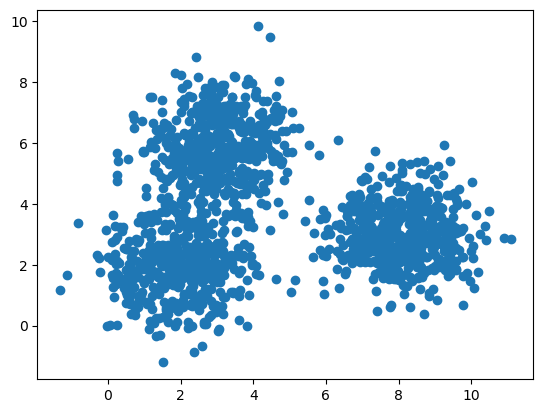

In [23]:
plt.scatter(x=X[:,0], y=X[:,1])

In [25]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # return index of the closest centroid
    return np.argmin(D, axis = 1)

def has_converged(centroids, new_centroids):
    # return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points that are assigned to the k-th cluster
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0) # then take average
    return centroids

In [27]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

In [29]:
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])

Centers found by our algorithm:
 [[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]


In [31]:
labels

[array([0, 2, 2, ..., 1, 1, 1], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 0], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 0], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 0], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 0], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 0], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 0], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 0], dtype=int64)]

ValueError: 'c' argument has 12000 elements, which is inconsistent with 'x' and 'y' with size 1500.

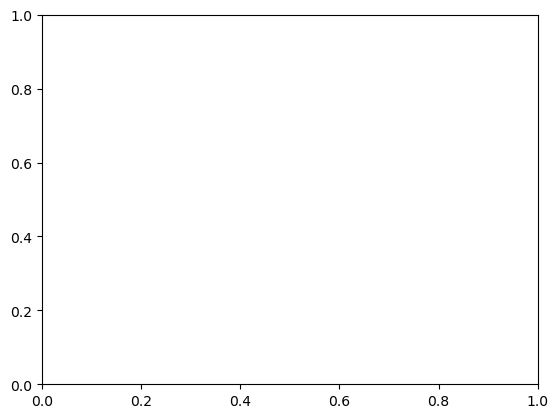

In [33]:
plt.scatter(x=X[:,0], y=X[:,1], c=labels)

## Using scikit-learn library

In [69]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)
pred_label.size

Centers found by scikit-learn:
[[8.07476866 3.01494931]
 [3.02521978 5.94885115]
 [1.98112961 1.95794411]]


D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


1500

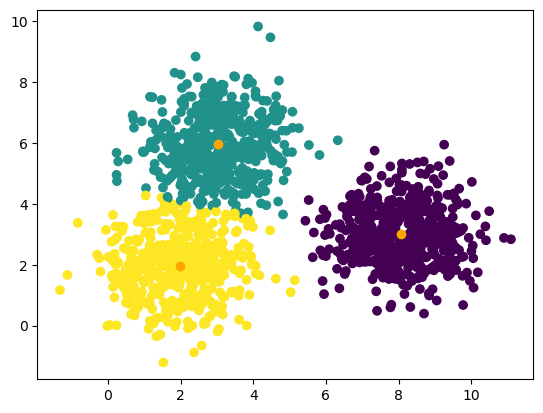

In [77]:
plt.scatter(x=X[:,0], y=X[:,1], c=pred_label)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'orange')

## Test with other dataset

In [106]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
        centers=8, n_samples=500, n_features=2, shuffle=True, random_state=40
    )

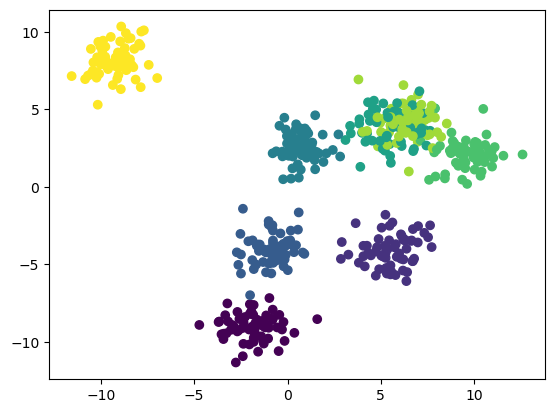

In [108]:
plt.scatter(x=X[:,0], y=X[:,1],c=y)

In [110]:
kmean = KMeans(8)

D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


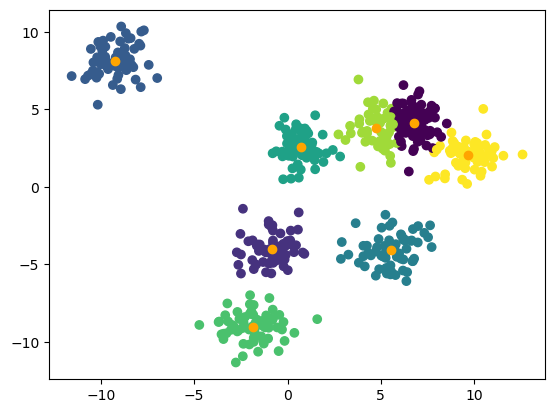

In [114]:
kmean.fit(X)
y_predict = kmean.predict(X)
plt.scatter(x=X[:,0], y=X[:,1],c=y_predict)
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], color = 'orange')